<a href="https://colab.research.google.com/github/Luckysolex/Data-Science-Projects/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Regression**

Decision Tree Regression is a machine learning algorithm that predicts a continuous numeric value by learning a series of if-else rules that split the data based on the most important features.

A Decision Tree is like a flowchart or a game of 20 Questions:

* The model asks simple yes/no questions about the data

* Each question splits the data into smaller groups

* At the end, it gives a number as the final prediction


## **How it works (easy idea)**

Imagine predicting a house price:

Is the house in a good location?

Is the house big?

Does it have many rooms?

By answering these questions step by step, the model finally reaches a value

# **Parts of a Decision Tree**
1. **Root Node**

* This is the starting point of the tree.

* It contains all the data.

* The tree asks the first and most important question here.

Example:
“Is house size greater than 150 sqm?”

2. **Internal Nodes (Decision Nodes)**

* These are the middle points of the tree.

* Each node asks a new question.

Example questions:

“Income > 50,000?”

“Number of rooms ≥ 3?”

Depending on the answer (Yes or No), the data moves to the next step.

3. **Leaf Nodes**

* These are the end points of the tree.

* No more questions are asked here.

* The model gives its final prediction.

In regression, this is a number, usually the average of the values in that group.

Example: Predicted house price = ₦30,000,000

4. **Branches**

* Branches are the paths that connect the nodes.

* They show the result of each question:

Yes → go one way

No → go another way

They guide the data from the top of the tree to the final prediction.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree

In [2]:
df = pd.read_csv("/content/drive/MyDrive/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df = df.dropna()

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# Define features and target
X = df[["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]]
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create and train the Decision Tree Regressor
model = DecisionTreeRegressor(
    max_depth=10,         # Limit depth to prevent overfitting
    min_samples_split=20, # Minimum samples required to split a node
    min_samples_leaf=10,  # Minimum samples required at a leaf node
    random_state=42
    )
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20,
                      random_state=42)

**Remember**

A Decision Tree Regressor works like a game of 20 Questions.
It keeps asking yes/no questions to narrow down the data until it can make a prediction.

Creating the model

**`dt_regressor = DecisionTreeRegressor()`**


This line creates a Decision Tree Regressor from sklearn.

Inside the parentheses are hyperparameters — these are settings that control how the tree behaves and how it asks questions.

**`max_depth = 10`**

This limits how deep the tree can go (how many levels of questions it can ask).

Example

**“Don’t go too deep asking questions!”**

* Each level is one yes/no question

* If the tree goes too deep, it can memorize the data, which is bad

* By setting max_depth = 10, we are telling the tree:

“You can only ask up to 10 questions before you must stop and give an answer.”

**This helps keep the model simple and general.**

**`min_samples_split = 20`**

A node must have at least 20 data points before it is allowed to split.

Example

“Only split a group if it’s big enough!”

A split means the tree wants to ask a question like:

“Is income greater than ₦300,000?”

We are telling the tree:

“Don’t ask a new question unless there are at least 20 houses in this group.”

**This prevents the tree from making decisions based on too little data.**

**`min_samples_leaf = 10`**

Each leaf node (final answer box) must contain at least 10 data points.

This means the model cannot create a final prediction from a very small group.

Example

“Each final answer group should have at least 10 houses.”

A leaf is the end of the tree

This is where the final prediction is made
**bold text**
We are telling the tree:

“Make sure every final prediction is based on at least 10 examples.”

This makes predictions more stable and reliable.

In [12]:
# Make prediction for the train dataset
y_train_pred = model.predict(X_train)
print(y_train_pred)

[221870.29245283 102065.13409962 244037.13100437 ... 345400.
 261352.63157895 251872.72727273]


In [13]:
# Create a Dataframe for the Actual vs Predicted values on the train set
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
df_train.head()

,Actual,Predicted
17727,227600.0,221870.292453
2057,110400.0,102065.134100
6453,248100.0,244037.131004
4619,305600.0,375100.250000
15266,214600.0,231400.897436


In [14]:
# Make predictions for the test dataset
y_test_pred = model.predict(X_test)
print(y_test_pred)

[215201.53030303 188709.375      202709.3187067  ...  79421.76470588
 113330.76923077 131809.5505618 ]


In [15]:
# Create a Dataframe for the Actual vs Predicted values for the test data
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_test.head()

,Actual,Predicted
14416,245800.0,215201.530303
16383,137900.0,188709.375000
7731,218200.0,202709.318707
1410,220800.0,112925.352113
1335,170500.0,158175.342466


## Evaluation Metrics

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Metrics for training data
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"R2 Score:", round(train_r2, 4))
print(f"Mean Absolute Error:", round(train_mae, 4))

R2 Score: 0.8054
Mean Absolute Error: 34361.2847


In [22]:
# Calculate Metrics for the test data
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"R2 Score:", round(test_r2, 4))
print(f"Mean Absolute Error:", round(test_mae, 4))

R2 Score: 0.7312
Mean Absolute Error: 40685.6241


In [23]:
average_house_price = df['median_house_value'].mean()
MAE_percentage_avg = (test_mae / average_house_price) * 100
print(round(MAE_percentage_avg, 2))

19.67


**Feature Importance**

Feature Importance tells us how much each input feature contributes to the model’s predictions.
It helps us understand which features the tree thinks are most useful.

**How it works in Decision Trees**

1. Tree splitting

While training, the tree keeps asking questions (splitting the data) based on different features.

2. Measuring usefulness

Each split is evaluated by how much it reduces prediction error (e.g., Mean Squared Error for regression).

3. Assigning importance

Features that help improve predictions more often get higher importance scores.

Features that rarely improve predictions get lower scores.



In [25]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values(by='importance', ascending=False)
display(feature_importance)

,feature,importance
7,median_income,0.597315
0,longitude,0.171375
1,latitude,0.149376
2,housing_median_age,0.052824
5,population,0.011115
6,households,0.006720
4,total_bedrooms,0.006472
3,total_rooms,0.004802


**`X.columns`**

* This gives the names of your features (like 'median_income', 'total_rooms', etc.)


**`model.feature_importances_`**

* After training, the decision tree tells you how much each feature was used to make decisions.

**`sort_values('importance', ascending=False)`**

* Sorts the table from most to least important features.

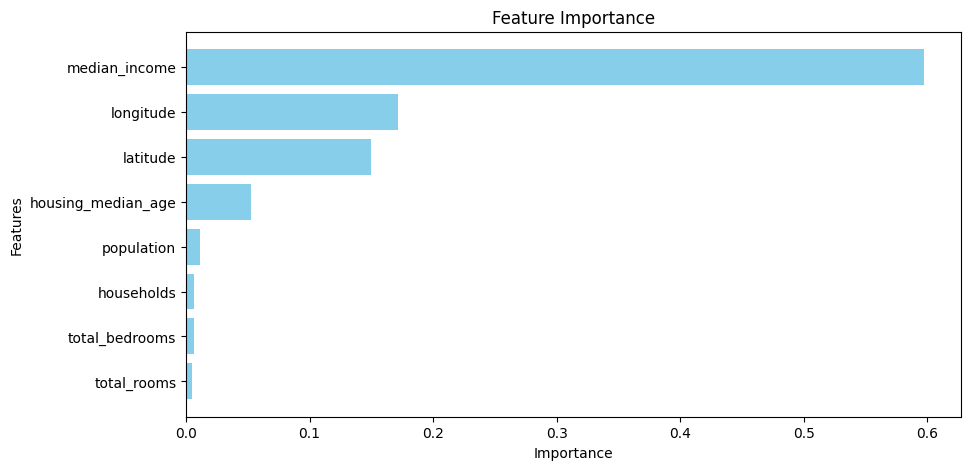

In [26]:
sorted_importance = feature_importance.sort_values(by='importance', ascending=True)

plt.figure(figsize=(10, 5))
plt.barh(sorted_importance['feature'], sorted_importance['importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

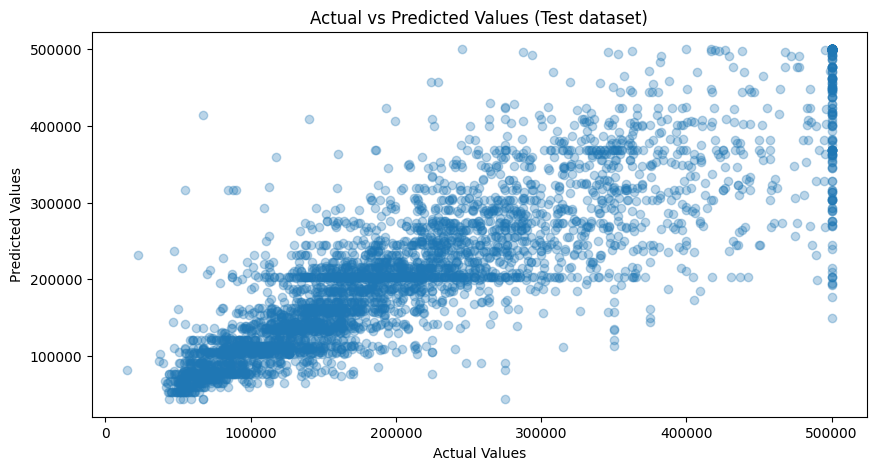

In [28]:
# Plot Actual vs Predicted values for the testing set
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Test dataset)')
plt.show()

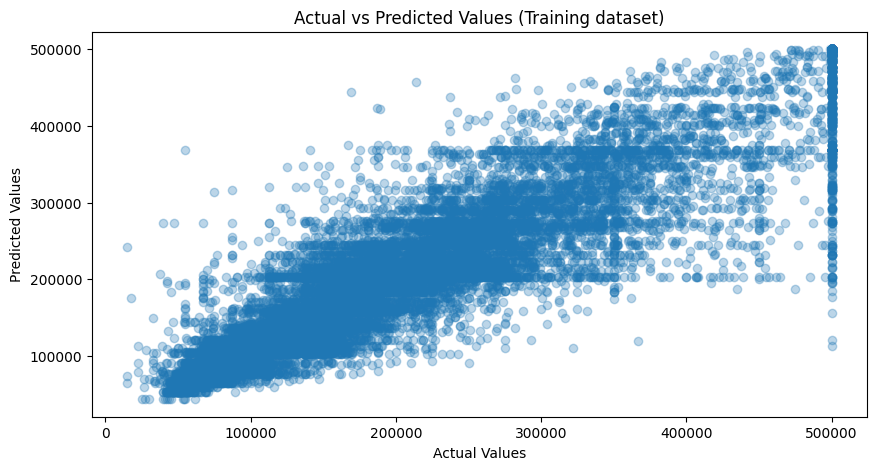

In [29]:
# Plot Actual vs Predicted values for the Training dataset
plt.figure(figsize=(10,5))
plt.scatter(y_train, y_train_pred, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Training dataset)')
plt.show()

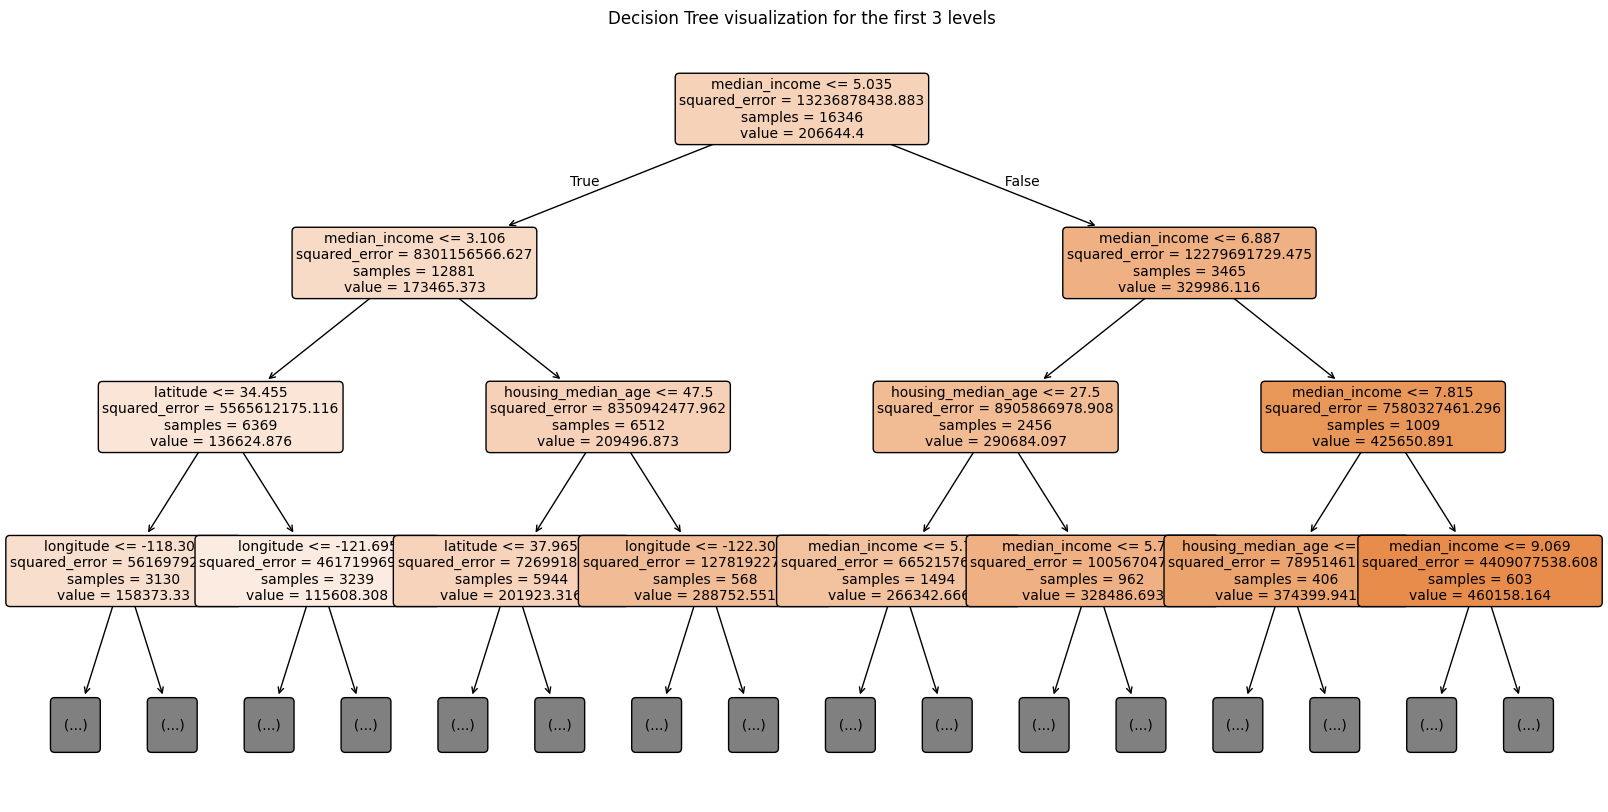

In [31]:
# Visualise a small portion of the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, rounded=True, feature_names=X.columns, max_depth=3, fontsize=10)
plt.title('Decision Tree visualization for the first 3 levels')
plt.show()

**`features = X.columns`**

Get the names of all features (columns) in the dataset.
These names will be used to label the nodes in the tree so you know which feature was split on

**`tree.plot_tree(...)`**

This function draws the decision tree diagram using the trained model.

**`model`**

This is the trained Decision Tree Regressor model.

**max_depth=3**

Show only the first 3 levels of the tree (root + 2 more splits)

**filled=True**

* Fill the nodes with colors based on the output value (house price).

* The color intensity shows how high or low the predicted value is.

**rounded=True**

Round the corners of the boxes (nodes) for better appearance.

**fontsize=10**

* Sets the text size inside each box.

* Makes sure the feature names, values, and outputs are readable.